In [1]:
import numpy as np
import PIL 
import math

In [3]:
an_image = PIL.Image.open("/content/sample_data/Spectacular-Photos-of-Niagara-Falls-Casinos.jpg")

Converting the image into an numpy array with rgb values

In [4]:
image_array = np.asarray(an_image)

In [5]:
print(image_array)

[[[200 231 226]
  [200 231 226]
  [200 231 226]
  ...
  [200 231 226]
  [200 231 226]
  [200 231 226]]

 [[200 231 226]
  [200 231 226]
  [200 231 226]
  ...
  [200 231 226]
  [200 231 226]
  [200 231 226]]

 [[200 231 226]
  [200 231 226]
  [200 231 226]
  ...
  [200 231 226]
  [200 231 226]
  [200 231 226]]

 ...

 [[119 125  79]
  [122 127  86]
  [134 140 102]
  ...
  [150 158 135]
  [133 141 118]
  [129 137 114]]

 [[129 127  86]
  [121 122  82]
  [100 102  65]
  ...
  [155 165 140]
  [132 142 117]
  [144 154 129]]

 [[174 191 147]
  [159 170 128]
  [145 147 108]
  ...
  [158 167 146]
  [145 154 135]
  [144 153 134]]]


In [6]:
shape = image_array.shape

(height, width, rgb)

In [7]:
print(shape)

(737, 1000, 3)


In [8]:
height = len(image_array)
width = len(image_array[0])

In [9]:
print(height)
print(width)

737
1000


In [10]:
print(image_array[0][0][2]) #blue value pixels
print(image_array[0][1][2])
print(image_array[0][2][2])

226
226
226


Creating the gaussian blur calculator, that will calculate how much weight each pixel color should be given

In [11]:
def gaussian_blur(x,y,st_dev):
  exponent_term = -((x ** 2) + (y ** 2))/(2 * st_dev ** 2)
  e_term = math.e ** exponent_term
  constant_term = 1/(2 * math.pi * st_dev ** 2)
  return e_term * constant_term

In [59]:
gaussian_blur(2,2,4)

0.007746874644353311

neighbor_values takes the pixels position, and calculates the new color value for a particular color, based on gaussian blur deviation. Also it makes sure to blur only the area listed by the 2 tuples. num_of_neigh is how many surrounding pixels to capture, i.e. num_of_neigh = 2, would find the neighbor value of a 3x3 box around the centre pixel, num_ofneigh = 3, would do the same for 5x5.

I noticed that when you do blurring and don't count the pixels outside of the given coordinates as neighbors, you end up with an ugly black box surrounding the coordinates. So if you want to get rid of that, you can set the no_ugly_box parameter to 1.

In [105]:
def neighbor_values_gauss(x,y,rgb,top_left,bottom_right,num_of_neigh,old_image,dev,no_ugly_box):

  #Getting all the values for each boundary to blur
  top = top_left[1]
  left = top_left[0]
  bottom = bottom_right[1]
  right = bottom_right[0]
  
  #to get rid of ugly box
  if no_ugly_box == 1:
    bottom = len(old_image)
    right = len(old_image[0])
    top = 0
    left = 0
    
  #Checking edge cases
  Col_Count = -num_of_neigh
  Row_Count = -num_of_neigh
  Col_Stop = num_of_neigh
  Row_Stop = num_of_neigh

  x_distance_left = x - left 
  if x_distance_left >= num_of_neigh:
    x_distance_left = num_of_neigh
  x_distance_right = right - x - 1
  if x_distance_right >= num_of_neigh:
    x_distance_right = num_of_neigh
  y_distance_top = y - top
  if y_distance_top >= num_of_neigh:
    y_distance_top = num_of_neigh
  y_distance_bottom = bottom - y - 1
  if y_distance_bottom >= num_of_neigh:
    y_distance_bottom = num_of_neigh

  Col_Count = Col_Count + (num_of_neigh - x_distance_left)
  Row_Count = Row_Count + (num_of_neigh - y_distance_top)
  Col_Stop = Col_Stop - (num_of_neigh - x_distance_right)
  Row_Stop = Row_Stop - (num_of_neigh - y_distance_bottom)

  #holds the final pixel value for that color
  final_pixel_value = 0

  for Row in range(Row_Count, Row_Stop + 1):
    for Col in range(Col_Count, Col_Stop + 1):
    
      #Summing up all neighboring pixel values based on gaussian distribution
      final_pixel_value = final_pixel_value + gaussian_blur(Col, Row, dev) * old_image[y+Row][x+Col][rgb]

  return final_pixel_value

Same function, but uses box blur method instead.

In [104]:
def neighbor_values_box(x,y,rgb,top_left,bottom_right,num_of_neigh,old_image,no_ugly_box):

  #Getting all the values for each boundary to blur
  top = top_left[1]
  left = top_left[0]
  bottom = bottom_right[1]
  right = bottom_right[0]

  #to get rid of ugly box
  if no_ugly_box == 1:
    bottom = len(old_image)
    right = len(old_image[0])
    top = 0
    left = 0

  #Checking edge cases
  Col_Count = -num_of_neigh
  Row_Count = -num_of_neigh
  Col_Stop = num_of_neigh
  Row_Stop = num_of_neigh

  x_distance_left = x - left 
  if x_distance_left >= num_of_neigh:
    x_distance_left = num_of_neigh
  x_distance_right = right - x - 1
  if x_distance_right >= num_of_neigh:
    x_distance_right = num_of_neigh
  y_distance_top = y - top
  if y_distance_top >= num_of_neigh:
    y_distance_top = num_of_neigh
  y_distance_bottom = bottom - y - 1
  if y_distance_bottom >= num_of_neigh:
    y_distance_bottom = num_of_neigh

  Col_Count = Col_Count + (num_of_neigh - x_distance_left)
  Row_Count = Row_Count + (num_of_neigh - y_distance_top)
  Col_Stop = Col_Stop - (num_of_neigh - x_distance_right)
  Row_Stop = Row_Stop - (num_of_neigh - y_distance_bottom)

  #Holds the final pixel value for that color
  final_pixel_value = 0

  for Row in range(Row_Count, Row_Stop + 1):
    for Col in range(Col_Count, Col_Stop + 1):
    
      #Summing up all neighboring pixel values based on box blur distribution
      final_pixel_value = final_pixel_value + 1/((num_of_neigh * 2 + 1) ** 2) * old_image[y+Row][x+Col][rgb]

  return final_pixel_value

blur_area, takes two tuples (x,y) coordinates, and blurs that particular area of the image, based on gaussian blur, or box blur. Use 0 for gaussian blur and 1 for box blur for the variable gauss_or_box. If using box blur, standard deviation variable can be anything. Returns 0 if theres an error.

In [106]:
def blur_area(old_image,top_left,bottom_right,num_of_neigh,gauss_or_box,st_dev,ugly_box):
  shape = old_image.shape
  height = len(old_image)
  width = len(old_image[0])
  new_image = np.zeros(shape)
  #Getting all the values for each boundary to blur
  top = top_left[1]
  left = top_left[0]
  bottom = bottom_right[1]
  right = bottom_right[0]

  #checking if our coordinates are out of bounds
  if top < 0:
    print("top pixel is out of bounds")
    return 0
  if bottom > height:
    print("bottom pixel is out of bounds")
    return 0
  if left < 0:
    print("left pixel is out of bounds")
    return 0
  if right > width:
    print("right pixel is out of bounds")
    return 0

  #checking if our coordinates make sense
  if top >= bottom:
    print("top pixel must be less than bottom pixel")
    return 0
  if left >= right:
    print("left pixel must be less than right pixel")
    return 0

  #gaussian blur case
  if gauss_or_box == 0:
    #checking if standard deviation is valid
    if st_dev <= 0:
      print("st_dev must be greater than 0")
      return 0
    
    for y in range(height):
      for x in range(width):
        for rgb in range(3):
          #if we are within the range of blurring use gaussian blur, otherwise just use the original pixel
          if y >= top and y <= bottom and x >= left and x <= right:
            new_image[y][x][rgb] = neighbor_values_gauss(x,y,rgb,top_left,bottom_right,num_of_neigh,old_image,st_dev,ugly_box)
          else:
            new_image[y][x][rgb] = int(old_image[y][x][rgb])

    return new_image.astype(int)

  #box blur case
  elif gauss_or_box == 1:
    for y in range(height):
      for x in range(width):
        for rgb in range(3):
          #if we are within the range of blurring use box blur, otherwise just use the original pixel
          if y >= top and y <= bottom and x >= left and x <= right:
            new_image[y][x][rgb] = neighbor_values_box(x,y,rgb,top_left,bottom_right,num_of_neigh,old_image,ugly_box)
          else:
            new_image[y][x][rgb] = int(old_image[y][x][rgb])

    return new_image.astype(int)

  else:
    print("Invalid gauss_or_box number, please choose 0 for gaussian blur and 1 for box blur")

  return 0




**Underneath is all testing, you don't really need to look at it if you don't want to**

In [70]:
new_image = blur_area(image_array,(700,500),(1000,737),1,0,1)

In [71]:
new_image

array([[[200, 231, 226],
        [200, 231, 226],
        [200, 231, 226],
        ...,
        [200, 231, 226],
        [200, 231, 226],
        [200, 231, 226]],

       [[200, 231, 226],
        [200, 231, 226],
        [200, 231, 226],
        ...,
        [200, 231, 226],
        [200, 231, 226],
        [200, 231, 226]],

       [[200, 231, 226],
        [200, 231, 226],
        [200, 231, 226],
        ...,
        [200, 231, 226],
        [200, 231, 226],
        [200, 231, 226]],

       ...,

       [[119, 125,  79],
        [122, 127,  86],
        [134, 140, 102],
        ...,
        [113, 118, 101],
        [108, 113,  96],
        [ 76,  80,  67]],

       [[129, 127,  86],
        [121, 122,  82],
        [100, 102,  65],
        ...,
        [115, 122, 104],
        [110, 117,  99],
        [ 78,  83,  70]],

       [[174, 191, 147],
        [159, 170, 128],
        [145, 147, 108],
        ...,
        [ 84,  89,  77],
        [ 82,  87,  75],
        [ 58,  62,  53]]

gaussian blur with standard deviation of 1, and neighboring pixels of 1

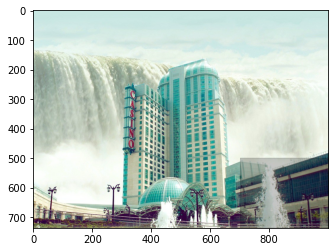

In [72]:
import matplotlib.pyplot as plt
plt.imshow(new_image)
plt.show()

original image

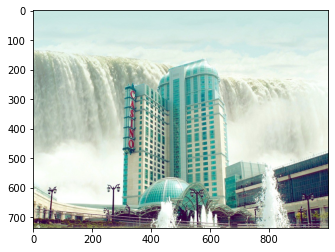

In [48]:
plt.imshow(image_array)
plt.show()

In [73]:
new_image = blur_area(image_array,(700,500),(1000,737),3,0,1)

In [74]:
new_image

array([[[200, 231, 226],
        [200, 231, 226],
        [200, 231, 226],
        ...,
        [200, 231, 226],
        [200, 231, 226],
        [200, 231, 226]],

       [[200, 231, 226],
        [200, 231, 226],
        [200, 231, 226],
        ...,
        [200, 231, 226],
        [200, 231, 226],
        [200, 231, 226]],

       [[200, 231, 226],
        [200, 231, 226],
        [200, 231, 226],
        ...,
        [200, 231, 226],
        [200, 231, 226],
        [200, 231, 226]],

       ...,

       [[119, 125,  79],
        [122, 127,  86],
        [134, 140, 102],
        ...,
        [145, 151, 130],
        [133, 139, 119],
        [ 97, 102,  86]],

       [[129, 127,  86],
        [121, 122,  82],
        [100, 102,  65],
        ...,
        [137, 145, 123],
        [126, 133, 113],
        [ 92,  97,  82]],

       [[174, 191, 147],
        [159, 170, 128],
        [145, 147, 108],
        ...,
        [103, 109,  93],
        [ 95, 101,  87],
        [ 69,  74,  63]]

gaussian blur with standard deviation of 1 and neighboring pixels of 3

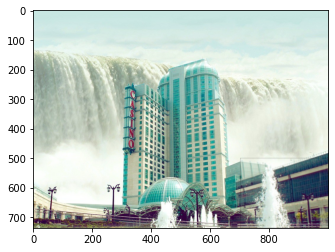

In [75]:
plt.imshow(new_image)
plt.show()

gaussian blur with standard deviation of 3 and neighboring pixels of 1

In [76]:
new_image = blur_area(image_array,(700,500),(1000,737),1,0,3)

In [77]:
new_image

array([[[200, 231, 226],
        [200, 231, 226],
        [200, 231, 226],
        ...,
        [200, 231, 226],
        [200, 231, 226],
        [200, 231, 226]],

       [[200, 231, 226],
        [200, 231, 226],
        [200, 231, 226],
        ...,
        [200, 231, 226],
        [200, 231, 226],
        [200, 231, 226]],

       [[200, 231, 226],
        [200, 231, 226],
        [200, 231, 226],
        ...,
        [200, 231, 226],
        [200, 231, 226],
        [200, 231, 226]],

       ...,

       [[119, 125,  79],
        [122, 127,  86],
        [134, 140, 102],
        ...,
        [ 21,  22,  18],
        [ 20,  21,  18],
        [ 13,  14,  11]],

       [[129, 127,  86],
        [121, 122,  82],
        [100, 102,  65],
        ...,
        [ 21,  22,  19],
        [ 21,  22,  19],
        [ 13,  14,  12]],

       [[174, 191, 147],
        [159, 170, 128],
        [145, 147, 108],
        ...,
        [ 14,  15,  13],
        [ 14,  15,  13],
        [  9,  10,   8]]

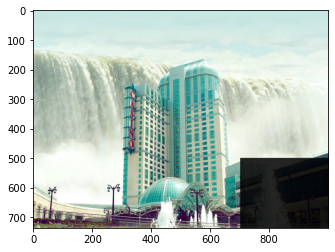

In [78]:
plt.imshow(new_image)
plt.show()

gaussian blur with standard deviation of 3 and neighboring pixels of 3

In [79]:
new_image = blur_area(image_array,(700,500),(1000,737),3,0,3)

In [80]:
new_image

array([[[200, 231, 226],
        [200, 231, 226],
        [200, 231, 226],
        ...,
        [200, 231, 226],
        [200, 231, 226],
        [200, 231, 226]],

       [[200, 231, 226],
        [200, 231, 226],
        [200, 231, 226],
        ...,
        [200, 231, 226],
        [200, 231, 226],
        [200, 231, 226]],

       [[200, 231, 226],
        [200, 231, 226],
        [200, 231, 226],
        ...,
        [200, 231, 226],
        [200, 231, 226],
        [200, 231, 226]],

       ...,

       [[119, 125,  79],
        [122, 127,  86],
        [134, 140, 102],
        ...,
        [ 73,  75,  66],
        [ 61,  63,  56],
        [ 48,  49,  43]],

       [[129, 127,  86],
        [121, 122,  82],
        [100, 102,  65],
        ...,
        [ 57,  59,  51],
        [ 48,  50,  43],
        [ 37,  39,  34]],

       [[174, 191, 147],
        [159, 170, 128],
        [145, 147, 108],
        ...,
        [ 43,  45,  38],
        [ 36,  38,  32],
        [ 28,  30,  25]]

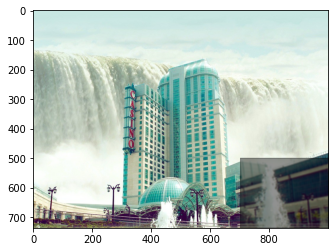

In [81]:
plt.imshow(new_image)
plt.show()

box blur with neighboring pixels of 1

In [89]:
new_image = blur_area(image_array,(700,500),(1000,737),1,1,0)

In [90]:
new_image

array([[[200, 231, 226],
        [200, 231, 226],
        [200, 231, 226],
        ...,
        [200, 231, 226],
        [200, 231, 226],
        [200, 231, 226]],

       [[200, 231, 226],
        [200, 231, 226],
        [200, 231, 226],
        ...,
        [200, 231, 226],
        [200, 231, 226],
        [200, 231, 226]],

       [[200, 231, 226],
        [200, 231, 226],
        [200, 231, 226],
        ...,
        [200, 231, 226],
        [200, 231, 226],
        [200, 231, 226]],

       ...,

       [[119, 125,  79],
        [122, 127,  86],
        [134, 140, 102],
        ...,
        [143, 149, 127],
        [140, 147, 125],
        [ 90,  94,  79]],

       [[129, 127,  86],
        [121, 122,  82],
        [100, 102,  65],
        ...,
        [146, 155, 132],
        [143, 152, 129],
        [ 91,  97,  83]],

       [[174, 191, 147],
        [159, 170, 128],
        [145, 147, 108],
        ...,
        [ 97, 104,  89],
        [ 97, 103,  89],
        [ 62,  67,  57]]

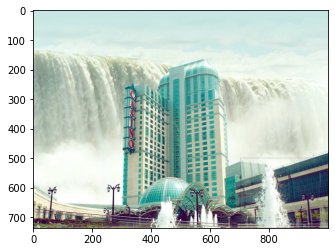

In [91]:
plt.imshow(new_image)
plt.show()

box blur with neighboring pixels of 3

In [92]:
new_image = blur_area(image_array,(700,500),(1000,737),3,1,0)

In [93]:
new_image

array([[[200, 231, 226],
        [200, 231, 226],
        [200, 231, 226],
        ...,
        [200, 231, 226],
        [200, 231, 226],
        [200, 231, 226]],

       [[200, 231, 226],
        [200, 231, 226],
        [200, 231, 226],
        ...,
        [200, 231, 226],
        [200, 231, 226],
        [200, 231, 226]],

       [[200, 231, 226],
        [200, 231, 226],
        [200, 231, 226],
        ...,
        [200, 231, 226],
        [200, 231, 226],
        [200, 231, 226]],

       ...,

       [[119, 125,  79],
        [122, 127,  86],
        [134, 140, 102],
        ...,
        [120, 123, 110],
        [100, 103,  91],
        [ 80,  83,  73]],

       [[129, 127,  86],
        [121, 122,  82],
        [100, 102,  65],
        ...,
        [ 91,  94,  82],
        [ 76,  78,  68],
        [ 61,  63,  55]],

       [[174, 191, 147],
        [159, 170, 128],
        [145, 147, 108],
        ...,
        [ 69,  73,  62],
        [ 57,  60,  51],
        [ 46,  49,  42]]

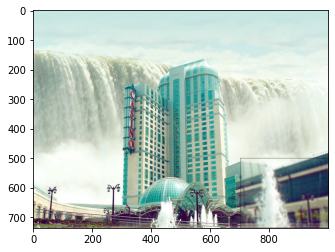

In [94]:
plt.imshow(new_image)
plt.show()

Covering all corners and edges, to make sure we don't go out of bounds test

In [95]:
new_image = blur_area(image_array,(0,0),(1000,737),1,1,0)

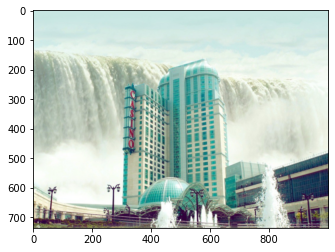

In [96]:
plt.imshow(new_image)
plt.show()

In [ ]:
new_image

original

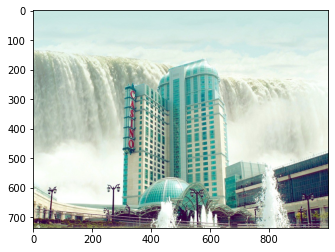

In [97]:
plt.imshow(image_array)
plt.show()

a

Added new feature to get rid of black box surrounding blurred area

In [109]:
new_image = blur_area(image_array,(700,500),(1000,737),3,1,0,1)

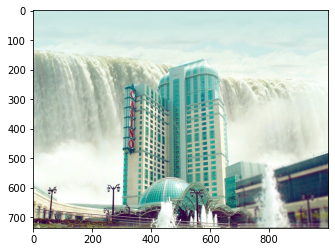

In [110]:
plt.imshow(new_image)
plt.show()